# Reverse Search - Vertices Only

Initializing the A and b Matrices

In [376]:
import numpy as np
import matplotlib.pyplot as plt


array = [
    [0.9206, 0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0.9206, 0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.07943, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0.9206, 0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.07943, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0.9206, 0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0.6406, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0.07943, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0.9206, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6406, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0.07943, 0, 0, 0, 0, 0.07943],
    [0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6406, 0, 0, 0, 0.6406, 0.07943, 0, 0, 0, 0, 0.07943, 0, 0, 0.07943, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.07943, 0.07943, 0, 0]
]

b = [0.4, 0.1, 0.2, 0.05, 0.05, 0, 0.2]

array = np.array(array)


# Perturbing 0 Vector to find another Vertex

Best Error: 0.4004830332203653 Temperature: 0.01
Best Error: 0.4004336636251297 Temperature: 0.01
Best Error: 0.3282373134726349 Temperature: 0.01
Best Error: 0.3282268737976151 Temperature: 0.01
Best Error: 0.3028874140890417 Temperature: 0.01
Best Error: 0.250288928333286 Temperature: 0.01
Best Error: 0.2502794465250484 Temperature: 0.01
Best Error: 0.2502260791399998 Temperature: 0.01
Best Error: 0.20016262911085334 Temperature: 0.01
Best Error: 0.20012868398828357 Temperature: 0.01
Best Error: 0.20003171882224902 Temperature: 0.01
Best Error: 0.20002035741524457 Temperature: 0.01
Best Error: 0.15006771234312194 Temperature: 0.01
Best Error: 0.1500658095435741 Temperature: 0.01
Best Error: 0.14463733317358918 Temperature: 0.01
Best Error: 0.14462988206299032 Temperature: 0.01
Best Error: 0.14462486863601962 Temperature: 0.01
Best Error: 0.09465639082347067 Temperature: 0.01
Best Error: 0.09465568628627126 Temperature: 0.01
Best Error: 0.09464545690516739 Temperature: 0.01
Best Error

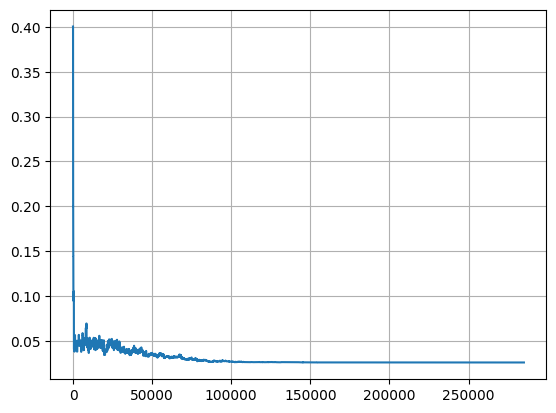

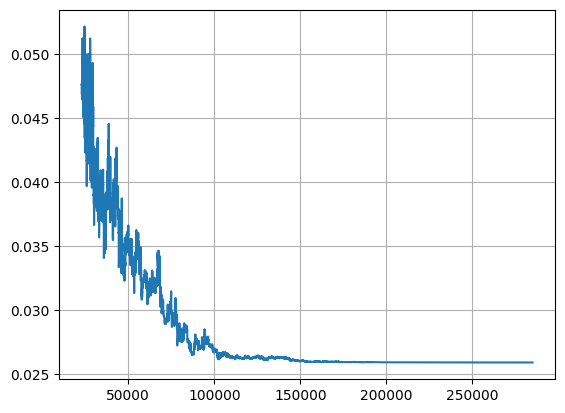

In [487]:
import numpy as np
import matplotlib.pyplot as plt


# Function to calculate the custom error
def calculate_error(phi):
    computed_b = np.dot(array, phi)
    diff = b - computed_b # Expected to be positive
    
    
     
    # Tolerance for floating point comparisons
    tol = 0.045
    
    
    penalty1 = 4*np.sum(diff[diff < 0])  # Only sum negative differences and apply penalty
    penalty2 = 12.5 * np.min(diff) if np.min(diff) < 0 else 0
    penalty3 = 2*np.max(diff) # Super normal penalty for the largest positive difference
    
    # Identify active constraints in Ax <= b
    penalty4 = 0
    active_constraints = np.where(np.abs(np.dot(array, phi) - b) < tol)[0]
    active_nonneg_constraints = np.where(phi < tol)[0]

    # Create the matrix A_total by combining active constraints
    A_eq = array[active_constraints, :]
    I_active = np.eye(len(phi))[active_nonneg_constraints, :]
    A_total = np.vstack((A_eq, I_active))
    
    # Check if the number of active constraints is at least the number of variables
    if A_total.shape[0] < len(phi):
        penalty4 =  0.1*(len(phi) - A_total.shape[0])

    penalty5 =  0.001*(1-sum(phi))
    
    
    
    penalties = -penalty1 - penalty2 + penalty3 + penalty4 + penalty5
    return penalties#, penalty2

# Initial phi and error
initial_phi = np.zeros(len(array[0]))
computed_b = np.dot(array, initial_phi)
initial_error = calculate_error(initial_phi)


# Simulated Annealing setup
best_phi = initial_phi.copy()
best_error = initial_error
current_phi = best_phi.copy()
current_error = best_error

# Parameters
T = 10e-3  # Initial temperature
T_min = 10e-8  # Minimum temperature
alpha = 0.98 # Cooling rate
num_iterations = 500  # Iterations per temperature
iter = 0
counter = []
error_values = []
best_values_all = []
best_values_all.append(best_phi)
step_size = 0.29

# Annealing process
while T > T_min:
    
    for i in range(num_iterations):

        iter += 1

        new_phi = current_phi.copy()
        index = np.random.randint(0, len(new_phi))
        change = np.random.uniform(-step_size, step_size)
        new_phi[index] += change
        new_phi[new_phi < 0] = 0  # Ensure non-negativity


        # Check if the sum constraint is violated
        if np.sum(new_phi) > 1:
            continue

        if iter > 580000:
            new_phi = new_phi/np.sum(new_phi)
        # Calculate new error
        new_error = calculate_error(new_phi)

        # Acceptance condition
        if new_error < current_error or np.random.uniform() < np.exp((current_error - new_error) / T):
            current_phi = new_phi
            current_error = new_error
            counter.append(iter)
            error_values.append(current_error/2)
            if new_error < best_error:
                best_error = new_error
                best_phi = new_phi
                print("Best Error:", best_error/2, "Temperature:", np.round(T,4))
    
                best_values_all.append(best_phi)

    # Cool down
    T *= alpha
    step_size *= alpha



## Output Results

print("Best Error:", best_error/2)
print("Best Phi:", np.round(best_phi, 3))
print("Sum of best phi", np.sum(best_phi))

plt.plot(counter, error_values)
plt.grid()
plt.show()

plt.plot(counter[10000:], error_values[10000:])
plt.grid()
plt.show()

In [488]:
print ('Given b     ', b)
print()

sum(best_phi)
print('Best Phi:', np.round(best_phi,12))
print('Sum of best phi', sum(best_phi))


vertices = [best_phi] 
print()

for vertex in vertices:
    comp_b = np.dot(array, vertex)
    error = np.linalg.norm(b - comp_b)
    print("Calculated b ", np.round(comp_b,4))
    print('Difference   ', np.round(b - comp_b,4))
    print('Infinity Norm', np.max(b - comp_b))
    print("L2 Norm      ", error)

    print()

print()

# Assuming A, b, and x are defined as previously
A = np.array(array)
b = np.array(b)
x = best_phi.copy()
#x = x/np.sum(x)

if is_vertex(A, b, x):
    print("The point is a vertex.")
else:
    print('not a vertex')

Given b      [0.4  0.1  0.2  0.05 0.05 0.   0.2 ]

Best Phi: [3.71055038e-01 9.19935083e-04 1.54669813e-01 2.61216406e-02
 2.61614764e-02 0.00000000e+00 3.52936186e-02 7.95557638e-02
 3.44289825e-02 4.01242120e-05 3.99906000e-07 0.00000000e+00
 2.76379000e-07 0.00000000e+00 4.34999000e-07 0.00000000e+00
 2.71752243e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.38652000e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Sum of best phi 0.9999999855479283

Calculated b  [0.3741 0.0741 0.1741 0.0241 0.0241 0.     0.1741]
Difference    [0.0259 0.0259 0.0259 0.0259 0.0259 0.     0.0259]
Infinity Norm 0.02591549426021658
L2 Norm       0.06347899749466791


not a vertex


# Confirming point is a vertex

In [484]:
import numpy as np

def is_vertex(A, b, x):
    # Tolerance for floating point comparisons
    tol = 0.025
    
    # Identify active constraints in Ax <= b
    active_constraints = np.where(np.abs(np.dot(A, x) - b) < tol)[0]
    
    # Identify active constraints in x >= 0
    active_nonneg_constraints = np.where(x < tol)[0]
    
    # Create the matrix A_total by combining active constraints
    A_eq = A[active_constraints, :]
    I_active = np.eye(len(x))[active_nonneg_constraints, :]
    A_total = np.vstack((A_eq, I_active))
    
    # Check if the number of active constraints is at least the number of variables
    if A_total.shape[0] < len(x):
        return False
    
    # Check if the rows of A_total are linearly independent by comparing rank
    rank_A_total = np.linalg.matrix_rank(A_total)
    
    return rank_A_total == len(x)

def perturb_points(x, perturbation, A, b):
    x1 = x.copy()
    x2 = x.copy()
    
    # Apply the perturbation to two indices
    x1[perturbation[0]] += perturbation[2]
    x1[perturbation[1]] -= perturbation[2]
    
    x2[perturbation[0]] -= perturbation[2]
    x2[perturbation[1]] += perturbation[2]
    
    # Check if both x1 and x2 are in the feasible region
    if (np.all(np.dot(A, x1) <= b) and np.all(x1 >= 0) and np.sum(x1) <= 1 and
        np.all(np.dot(A, x2) <= b) and np.all(x2 >= 0) and np.sum(x2) <= 1):
        return x1, x2
    return None, None

def find_points_averaging_to_x(A, b, x):
    # Small perturbation
    perturbation_magnitude = 0.01
    
    n = len(x)
    for i in range(n):
        for j in range(i + 1, n):
            # Create a perturbation vector
            perturbation = (i, j, perturbation_magnitude)
            
            # Attempt to find feasible perturbed points
            x1, x2 = perturb_points(x, perturbation, A, b)
            if x1 is not None and x2 is not None:
                return x1, x2
    
    raise ValueError("Could not find feasible perturbed points.")

# Assuming A, b, and x are defined as previously
A = np.array(array)
b = np.array(b)
x = best_phi.copy()
x = x/np.sum(x)

if is_vertex(A, b, x):
    print("The point is a vertex.")
else:
    x1, x2 = find_points_averaging_to_x(A, b, x)
    print("The point is not a vertex.")
    print("Here are two points that average to the given point:")
    print()
    print("Point 1:", np.round(x1,3))
    print("Original:", np.round(x,3))
    print("Point 2:", np.round(x2,3))


The point is not a vertex.
Here are two points that average to the given point:

Point 1: [0.    0.002 0.073 0.    0.016 0.    0.406 0.078 0.126 0.026 0.    0.
 0.    0.    0.    0.    0.272 0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.   ]
Original: [0.    0.002 0.063 0.    0.026 0.    0.406 0.078 0.126 0.026 0.    0.
 0.    0.    0.    0.    0.272 0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.   ]
Point 2: [0.    0.002 0.053 0.    0.036 0.    0.406 0.078 0.126 0.026 0.    0.
 0.    0.    0.    0.    0.272 0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.   ]
